In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import torch
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
#sys.path.append("../utils")
from utils.models import ConvLSTMModel


In [2]:
RESULTS_PATH = "/home/nick/Desktop/experiments_results/"
TEST_SET_PATH = "/home/nick/Desktop/experiments_results/milan_processed_test.npz"

In [3]:
RESULT_FOLDERS = {
    'no_scaling' : "conv_lstm_results_before_scaling_i=5_o=15/",
    'standard'   : "conv_lstm_with_data_standardisation_i=5_o=15/"
}

### Plots

In [78]:
def plot_learning_curves(label='standard'):

    full_path = RESULTS_PATH+RESULT_FOLDERS[label]
    dfs = {}
    for exp in os.listdir(full_path):
        dfs[exp] = pd.read_csv(full_path+exp+'/result_outputs/summary.csv')
        dfs[exp].drop(["curr_epoch"],axis=1,inplace=True)
    for exp in sorted(dfs.keys()):
        dfs[exp].plot(title=exp)
    return dfs

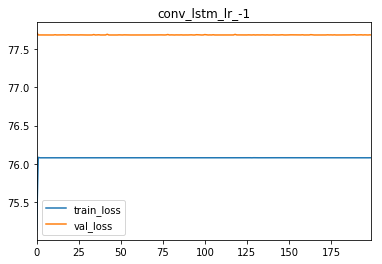

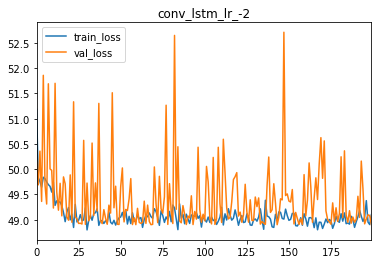

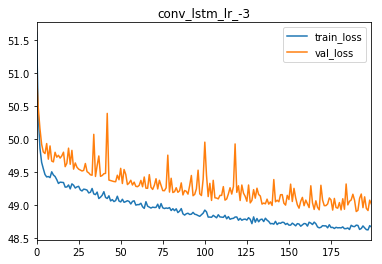

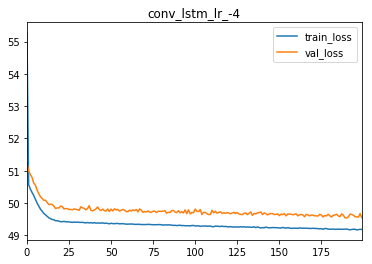

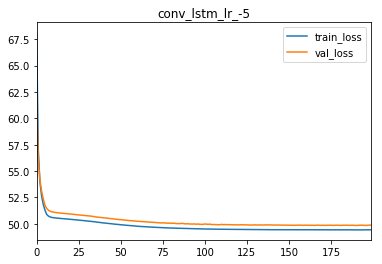

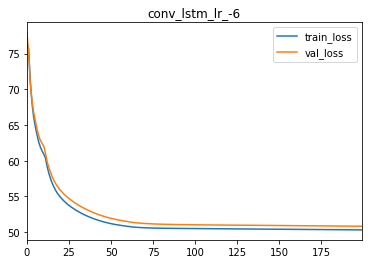

In [79]:
ns_df = plot_learning_curves('no_scaling')

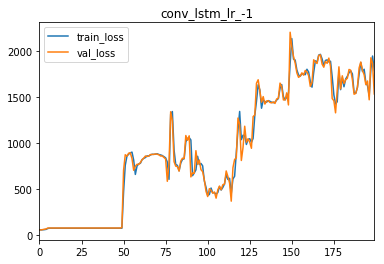

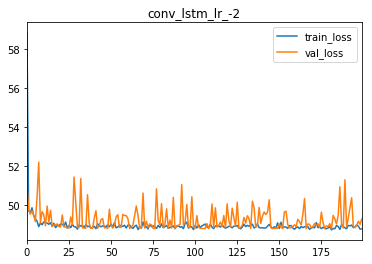

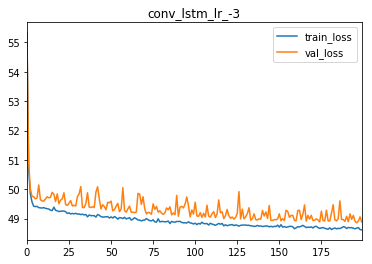

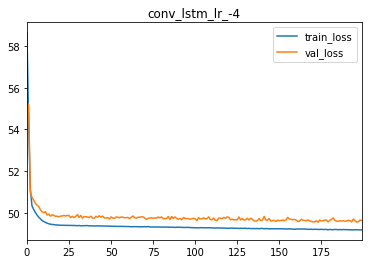

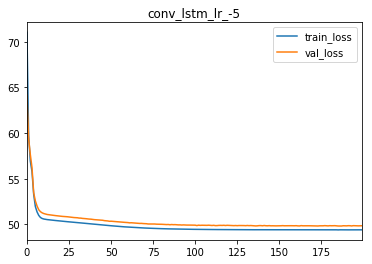

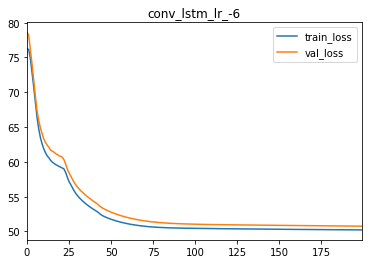

In [80]:
ns_df = plot_learning_curves('standard')

### Prediction vs ground_truth

In [16]:
def load_pytorch_model_to_cpu(MODEL_PATH):
    model = ConvLSTMModel(100,5,20,2,False)
    network = torch.load(MODEL_PATH,map_location='cpu')['network']
    from collections import OrderedDict
    new_state_dict = OrderedDict()
    for key,value in network.items():
        name = key[6:]
        new_state_dict[name] = value

    model.load_state_dict(new_state_dict)
    model.eval()
    return model

In [89]:
EXP = 'conv_lstm_lr_-3'
MODEL_PATH = RESULTS_PATH + RESULT_FOLDERS['standard'] + EXP +'/saved_models/train_model_latest'
model = load_pytorch_model_to_cpu(MODEL_PATH)
test_data = np.load(TEST_SET_PATH)

In [90]:
x = test_data['x'].transpose(0,3,1,2).astype(np.float32)
y = test_data['y'].transpose(0,3,1,2).astype(np.float32)
y.shape

(430, 15, 100, 100)

In [109]:
i = 180

In [110]:
example_input = torch.Tensor(x[i:i+2,...]).float().to('cpu')
ground_truth  = y[i,...]
pred = model.forward(example_input)
np_pred = pred[0][0,...].detach().numpy().squeeze()
from matplotlib.colors import Normalize

/usr/local/lib/python3.5/dist-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.5/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


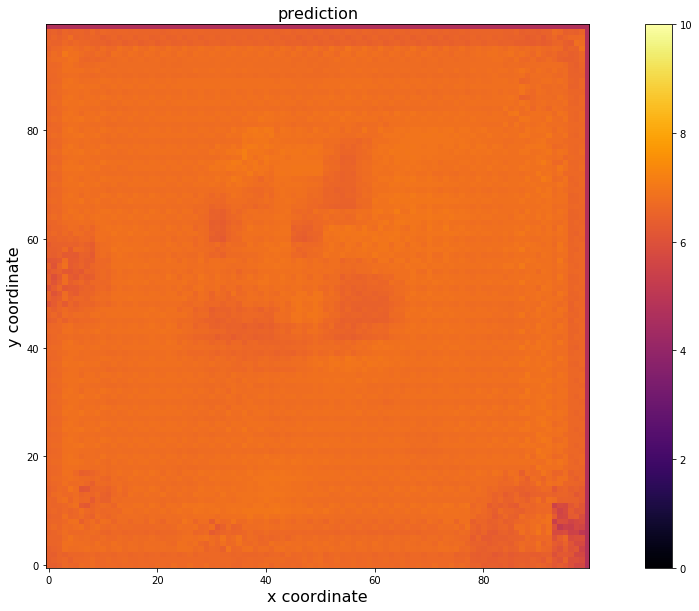

In [122]:
norm = Normalize(vmin=0,vmax=10)
plt.figure(figsize=(20,10))
plt.imshow(np_pred,origin='lower',norm=norm,cmap='inferno')
plt.title('prediction',fontsize=16)
plt.xlabel('x coordinate',fontsize=16)
plt.ylabel('y coordinate',fontsize=16)
plt.colorbar()

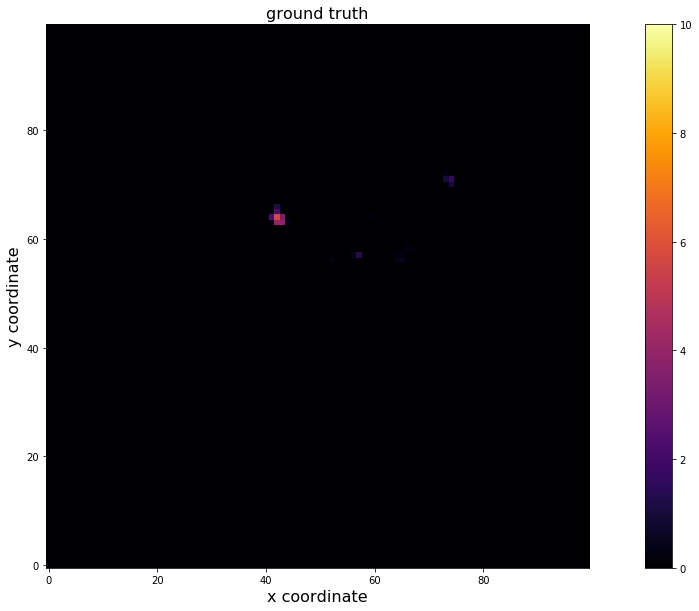

In [123]:

plt.figure(figsize=(20,10))
plt.imshow(ground_truth[0],origin='lower',norm=norm,cmap='inferno')
plt.title('ground truth',fontsize=16)
plt.xlabel('x coordinate',fontsize=16)
plt.ylabel('y coordinate',fontsize=16)
plt.colorbar()

(array([3.980e+02, 2.000e+00, 2.000e+00, 1.400e+01, 2.000e+01, 1.010e+02,
        1.742e+03, 9.918e+03, 7.340e+03, 4.630e+02]),
 array([4.73633575, 4.97972937, 5.22312298, 5.46651659, 5.7099102 ,
        5.95330381, 6.19669743, 6.44009104, 6.68348465, 6.92687826,
        7.17027187]),
 <a list of 10 Patch objects>)

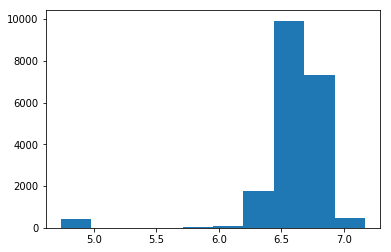

In [120]:
plt.hist(pred[0][...].detach().numpy().squeeze().flatten())

(array([1.49686e+05, 1.97000e+02, 3.50000e+01, 2.50000e+01, 1.10000e+01,
        1.30000e+01, 1.90000e+01, 5.00000e+00, 5.00000e+00, 4.00000e+00]),
 array([-0.41581076,  0.28013976,  0.97609029,  1.67204081,  2.36799134,
         3.06394187,  3.75989239,  4.45584292,  5.15179344,  5.84774397,
         6.5436945 ]),
 <a list of 10 Patch objects>)

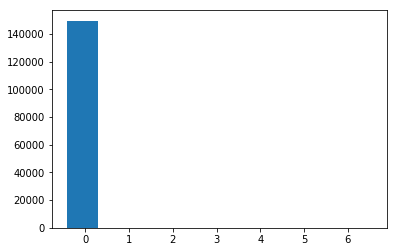

In [126]:
plt.hist(ground_truth[...].squeeze().flatten())